# Initial EDA

## Load files and look at file types

In [79]:
import os
import pandas as pd
import numpy as np 

path_to_data = '/home/jlandesman/data'
subfolders = [f.path for f in os.scandir(path_to_data) if f.is_dir()]    

file_list = []
for subfolder in subfolders:
    for file in os.listdir(subfolder):
        file_list.append(os.path.join(subfolder, file))

print ("Number of files: {}".format(len(file_list)))

types_of_files = set([i.split(".")[1] for i in file_list])
print("Types of Files: {}".format(types_of_files))

Number of files: 4069
Types of Files: {'csv', 'tif'}


In [80]:
csvs = [i for i in file_list if i[-3:] == 'csv']

In [81]:
df1 = pd.read_csv(csvs[0])
df1.head(10)

,patient_id,breast_density,side,view,abn_num,mass_shape,mass_margins,assessment,pathology,subtlety,od_img_path,od_crop_path,mask_path
0,P_00001,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
1,P_00001,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
2,P_00004,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
3,P_00004,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
4,P_00004,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
5,P_00009,3,RIGHT,CC,1,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
6,P_00009,3,RIGHT,MLO,1,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
7,P_00015,3,LEFT,MLO,1,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
8,P_00018,2,RIGHT,CC,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
9,P_00018,2,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp


In [82]:
df2 = pd.read_csv(csvs[1])
df2.head()

,patient_id,breast_density,side,view,abn_num,calc_type,calc_distribution,assessment,pathology,subtlety,od_img_path,od_crop_path,mask_path
0,P_00005,3,RIGHT,CC,1,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc_Training_full_mammogram_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp
1,P_00005,3,RIGHT,MLO,1,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc_Training_full_mammogram_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp
2,P_00007,4,LEFT,CC,1,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc_Training_full_mammogram_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp
3,P_00007,4,LEFT,MLO,1,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc_Training_full_mammogram_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp
4,P_00008,1,LEFT,CC,1,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc_Training_full_mammogram_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp,Calc-Training_ROI-mask_and_crpped_images.jnlp


## How many patients?

In [93]:
patient_ids = pd.concat([df1['patient_id'], df2['patient_id']])
print("Number of unique patients: {}".format(len(patient_ids.unique())))

Number of unique patients 1249


## First look at Pathologies

In [92]:
pathologies = pd.concat([df1['pathology'], df2['pathology']])
print("Number of Unique Pathologies = {}  \n".format(pathologies.unique()))

print("Count of pathologies = \n{}".format(pathologies.value_counts()))

print("\nNumber of nulls: {}".format(sum(pathologies.isnull())))

Number of Unique Pathologies = ['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']  

Count of pathologies = 
MALIGNANT                  1216
BENIGN                     1144
BENIGN_WITHOUT_CALLBACK     580
Name: pathology, dtype: int64

Number of nulls: 0


## Since we have some duplicates, lets merge the files and look at the distribution among our 1249 patients

In [130]:
patients_and_pathologies = pd.concat([df1[['patient_id', 'pathology']], df2[['patient_id','pathology']]])
patients_and_pathologies.drop_duplicates().groupby('pathology').agg('count')

,patient_id
pathology,
BENIGN,555
BENIGN_WITHOUT_CALLBACK,130
MALIGNANT,611


## Load in sample file just for a look 

File name: Mass-Training_P_00001_LEFT_CC.tif
Shape of tif files: (4808, 3024)
Max Value = 65535, Min Value =  0


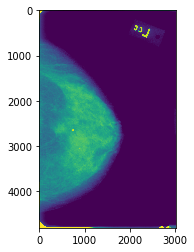

In [101]:
%matplotlib inline 
import matplotlib.pyplot as plt
from PIL import Image

print('File name:', file_list[0].split("/")[-1])
im = Image.open(file_list[0])
np_im = np.array(im)
print('Shape of tif files: {}'.format(np_im.shape))

max_value = np.max(np_im)
min_value = np.min(np_im)
print('Max Value = {}, Min Value =  {}'.format(max_value, min_value))

plt.imshow(np_im)